<a href="https://colab.research.google.com/github/SejalLambat19/Machine-Learning/blob/main/newprBONUS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.3581 - loss: 2.8708 - val_accuracy: 0.2083 - val_loss: 3.4948
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4167 - loss: 2.4814 - val_accuracy: 0.2083 - val_loss: 3.3338
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3385 - loss: 2.6494 - val_accuracy: 0.2083 - val_loss: 3.1752
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3659 - loss: 2.4675 - val_accuracy: 0.2083 - val_loss: 3.0206
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3776 - loss: 2.3148 - val_accuracy: 0.2083 - val_loss: 2.8708
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4049 - loss: 2.1524 - val_accuracy: 0.2083 - val_loss: 2.7254
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3815 - loss: 2.1065 - val_accuracy: 0.2083 - val_loss: 2.5829
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3737 - loss: 2.0105 - val_accuracy: 0.2083 - val_loss: 2.4453
Epoch 9/50


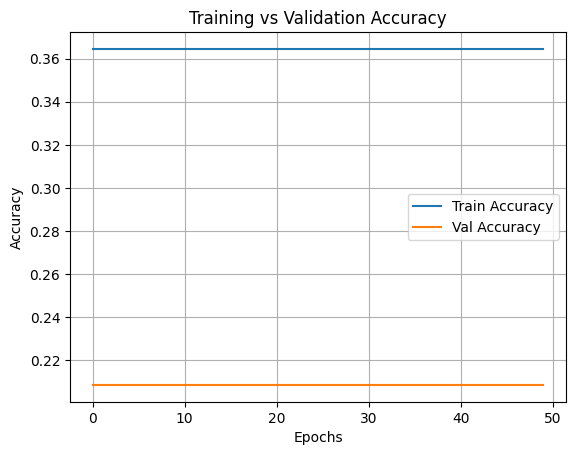

In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 2: Load Dataset
df = sns.load_dataset('iris')

# Step 3: Encode Target Column
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

# Step 4: Interactive Plot using Plotly
fig = px.scatter(df, x='sepal_length', y='sepal_width', color='species',
                 title='Sepal Length vs Width (Iris Dataset)',
                 hover_data=['species'])
fig.show()

# Step 5: Prepare Data for ML
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Build TensorFlow Model
model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(4,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 7: Train Model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

# Step 8: Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Step 9: Plot Training Accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
